# Contour Plotting

**Basic steps to create a simple countour plot with labels**

1. **Import Liberaries:** Import `matplotlib.pyplot` and `numpy`.
    1. `matplotlib.pyplot`: It is used to create differnt kind of chart like as `contour` chart.
    2. `numpy` : It is used to perform mathematical operation on data points. In our case we will use it to  Generate meshgrid data points from single array x and y data point
2. **Generate Data:** Generate a grid of x and y values and compute corresponding z values.
3. **Create Contour plot:** Create contour plot using `matplotlib.pyplot.countour` method. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging

In [2]:
mag_df, grav_df = pd.read_excel("./ground_geophysical_data_FS20_21.xlsx", sheet_name=None).values()

In [3]:
mag_df.head()

,LONG,Lat,Observed Magnetic,IGRF,Magnetic Anomaly,TS No.
0,74.251577,27.584103,47399.27258,47324.48391,74.788667,45I/06
1,74.252987,27.638902,47488.36056,47352.99398,135.366580,45I/06
2,74.253090,27.607691,47384.85419,47336.77684,48.077350,45I/06
3,74.253258,27.705263,47456.54011,47387.48896,69.051151,45I/06
4,74.255150,27.654795,47728.04100,47361.36844,366.672564,45I/06


In [4]:
x = np.linspace(min(mag_df.LONG), max(mag_df.LONG), 50)
y = np.linspace(min(mag_df.Lat), max(mag_df.Lat), 50)

In [5]:
X, Y = np.meshgrid(x,y)

In [16]:
# okg = OrdinaryKriging(mag_df.LONG, mag_df.Lat, mag_df["Magnetic Anomaly"], 
#                       variogram_model='linear', verbose=False, enable_plotting=False)

In [18]:
# z,ss = okg.execute("grid", X,Y, n_closest_points=5, backend='loop')

(50,)

In [32]:
mag_anomly = griddata((mag_df.LONG, mag_df.Lat), mag_df["Magnetic Anomaly"], (X,Y), 
                      method='linear', rescale=True, fill_value=0)
mag_anomly

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 485.77857505, 126.49091764, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 398.85212763,  97.79578507, ..., 199.29404505,
        192.91215486,   0.        ],
       ...,
       [  0.        , 191.57534649, 183.10131961, ...,  57.92119191,
          0.        ,   0.        ],
       [  0.        , 184.58236653, 183.46624213, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

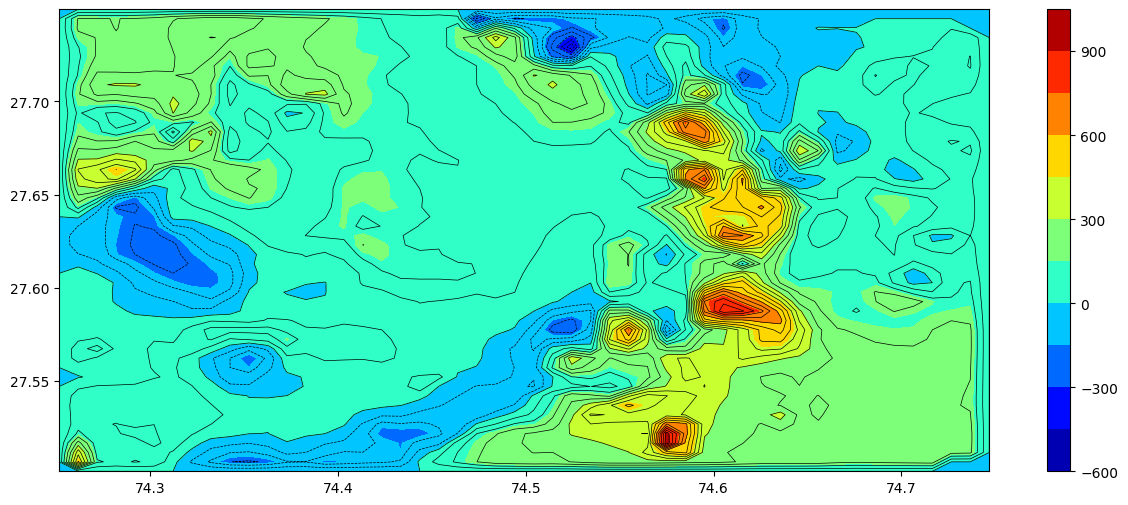

In [34]:
fig, ax = plt.subplots(figsize=(15,6))
ax.contour(X,Y,mag_anomly, levels=25, colors='k', linewidths=0.5)
contour = ax.contourf(X,Y,mag_anomly,levels=10, cmap="jet")
plt.colorbar(contour)

In [20]:
z.shape

(2500, 2500)

In [22]:
X.shape

(50, 50)

In [36]:
mag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LONG               610 non-null    float64
 1   Lat                610 non-null    float64
 2   Observed Magnetic  610 non-null    float64
 3   IGRF               610 non-null    float64
 4   Magnetic Anomaly   610 non-null    float64
 5   TS No.             610 non-null    object 
dtypes: float64(5), object(1)
memory usage: 28.7+ KB
